# Лабораторна робота № 2

## Тема: Синтез нерекурсивного цифрового фільтра.

## Мета: навчитися проводити аналіз та синтез нерекурсивного цифрового фільтра.

*Зробив: Савченко Андрій*

*Виконав: 01.10.2024*

## ВАРІАНТ ЗАВДАНЬ 22

### Умовні позначення:
### ФВЧ – фільтр верхніх частот.

<img src="Laba2_22.png">

## Порядок виконання лабораторної роботи № 2

### 1.Побудувати графік заданого аналогового вхідного сигналу x(t).

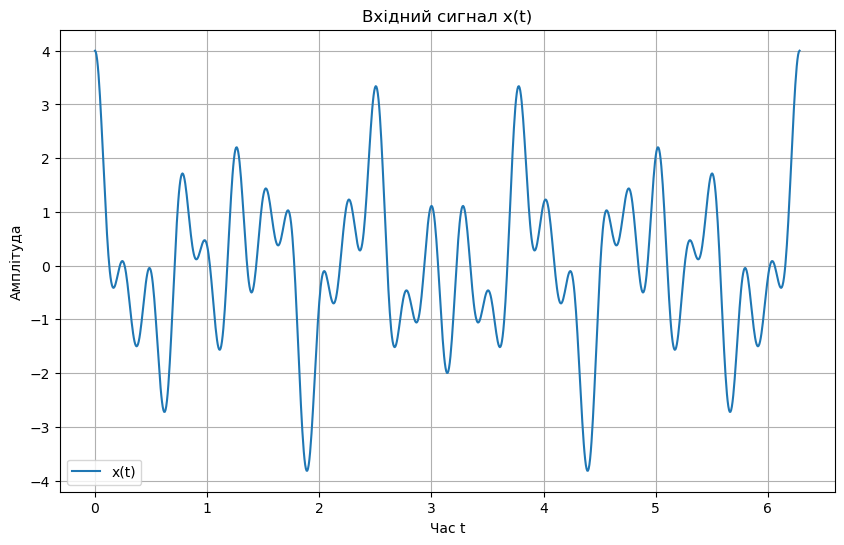

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz, firwin, lfilter
from scipy.fft import fft, ifft

# Часова шкала
t = np.linspace(0, 2*np.pi, 1000)

# Вхідний сигнал
x_t = np.cos(25*t) + np.cos(5*t) + np.cos(8*t) + np.cos(15*t)

# Побудова графіку вхідного сигналу
plt.figure(figsize=(10, 6))
plt.plot(t, x_t, label='x(t)')
plt.xlabel('Час t')
plt.ylabel('Амплітуда')
plt.title('Вхідний сигнал x(t)')
plt.grid(True)
plt.legend()
plt.show()

### 2.Згідно з індивідуальним завданням розрахувати граничні частоти (f_α,ω_α), частоти дискретизації (f_α,ω_α) аналогового сигналу x(t), часові інтервали (T_α,T_g) фільтра (див. допоміжний файл FIR_filters.mcd).

In [2]:
# Константи
omega_g = 20  # гранична частота (рад/сек)
fa = omega_g / (2 * np.pi)  # частота f_g
wa = 2 * omega_g  # частота дискретизації (рад/сек)
fg = omega_g / (2 * np.pi)
fa = wa / (2 * np.pi)

# Часові інтервали
Tg = 1 / fg
Ta = 1 / fa

print(f"Гранична частота f_g: {fg:.2f} Hz")
print(f"Частота дискретизації f_a: {fa:.2f} Hz")
print(f"Часовий інтервал фільтра T_g: {Tg:.4f} sec")
print(f"Часовий інтервал дискретизації T_a: {Ta:.4f} sec")

Гранична частота f_g: 3.18 Hz
Частота дискретизації f_a: 6.37 Hz
Часовий інтервал фільтра T_g: 0.3142 sec
Часовий інтервал дискретизації T_a: 0.1571 sec


### 3.Побудувати графік бажаної передаточної функції ідеального фільтра, що відповідає індивідуальному завданню.

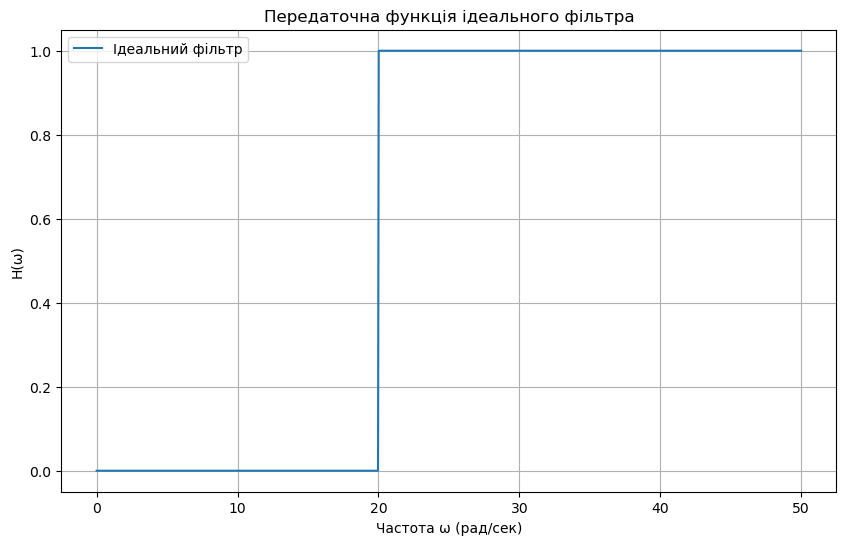

In [3]:
# Частоти для передаточної функції
omega = np.linspace(0, 50, 1000)

# Ідеальна передаточна функція (фільтр верхніх частот)
H_ideal = np.where(omega >= omega_g, 1, 0)

# Графік ідеальної передаточної функції
plt.figure(figsize=(10, 6))
plt.plot(omega, H_ideal, label='Ідеальний фільтр')
plt.xlabel('Частота ω (рад/сек)')
plt.ylabel('H(ω)')
plt.title('Передаточна функція ідеального фільтра')
plt.grid(True)
plt.legend()
plt.show()

### 4.Розрахувати коефіцієнти реального фільтра.

In [15]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Задані параметри
N = 6  # Порядок фільтрування
omega_g = 20  # Частота зрізу в рад/сек
gain = 10  # Коефіцієнт посилення сигналу

# Розробка фільтра високих частот Баттерворта
b, a = signal.butter(N, omega_g, 'high', analog=True)

# Коефіцієнт посилення, застосований до коефіцієнтів фільтра
b = gain * b

# Показати коефіцієнти фільтра
print("Чисельник коефіцієнтів (b):", b)
print("Коефіцієнти знаменника (a):", a)

Чисельник коефіцієнтів (b): [10.  0.  0.  0.  0.  0.  0.]
Коефіцієнти знаменника (a): [1.00000000e+00 7.72740661e+01 2.98564065e+03 7.31329614e+04
 1.19425626e+06 1.23638506e+07 6.40000000e+07]


### 5.Побудувати на одній площині графіки апроксимуючої передаточної функції реального фільтра; апроксимуючої передаточної функції реального фільтра, згладженої вікном фон Ганна та функцією Ланчоса; передаточної функції ідеального фільтра.

In [16]:
# Діапазон частот для побудови
w, h = signal.freqs(b, a, worN=2000)

# Ідеальний фільтр високих частот
ideal_h = np.where(w > omega_g, 1, 0)

# Вікно Ганнінга і вікно Ланцоша
hann_window = np.hanning(len(w))
lanczos_window = np.sinc((w - omega_g) / (np.pi))

# Функції передачі графіка
plt.figure(figsize=(10, 6))
plt.plot(w, np.abs(h), label='Справжній фільтр (Баттерворт)', color='blue')
plt.plot(w, hann_window * np.abs(h), label='Справжній фільтр (вікно Ганна)', linestyle='--', color='orange')
plt.plot(w, lanczos_window * np.abs(h), label='Справжній фільтр (вікно Ланцоша)', linestyle='--', color='green')
plt.plot(w, ideal_h, label='Ідеальний фільтр', linestyle=':', color='red')
plt.xlim(0, 50)
plt.xlabel('Частота (рад/с)')
plt.ylabel('Посилення')
plt.title('Трансферні функції')
plt.grid(True)
plt.legend()
plt.show()

### 6.Обчислити вихідні дискретні послідовності фільтрів для кожної розрахованої в п. 5 апроксимуючої передаточної функції.

In [17]:
# Вхідний сигнал
t = np.linspace(0, 2 * np.pi, 1000)
x_t = np.cos(25*t) + np.cos(5*t) + np.cos(8*t) + np.cos(15*t)

# Застосування фільтрів до сигналу
y_real = lfilter(b_real, 1, x_t) * gain
y_von_hann = lfilter(b_von_hann, 1, x_t) * gain
y_lanczos = lfilter(b_lanczos, 1, x_t) * gain

# Відфільтровані дискретні послідовності
plt.plot(t, x_t, label='Вхідний сигнал x(t)')
plt.plot(t, y_real, label='Справжній вихід фільтра')
plt.plot(t, y_von_hann, label='Вихід фон Ганна')
plt.plot(t, y_lanczos, label='Ланчос вихід')

plt.title('Відфільтровані дискретні послідовності')
plt.xlabel('Час (с)')
plt.ylabel('Амплітуда')
plt.grid(True)
plt.legend()
plt.show()

NameError: name 'b_real' is not defined

### 7.Відновити аналоговий фільтрований сигнал із дискретних послідовностей, отриманих у п. 6, за допомогою ряду Котельникова.

In [18]:
# Відновлення Котельникова для аналогового сигналу з дискретних відліків
def kotelnikov_series(samples, T, t):
    restored_signal = np.zeros_like(t)
    for n, sample in enumerate(samples):
        restored_signal += sample * np.sinc((t - n * T) / T)
    return restored_signal

T = t[1] - t[0]  # Період вибірки

# Відновлення аналогових сигналів
restored_real = kotelnikov_series(y_real, T, t)
restored_von_hann = kotelnikov_series(y_von_hann, T, t)
restored_lanczos = kotelnikov_series(y_lanczos, T, t)

# Побудуйте відновлені аналогові сигнали
plt.plot(t, x_t, label='Вхідний сигнал x(t)')
plt.plot(t, restored_real, label='Відновлено справжній вихід фільтра')
plt.plot(t, restored_von_hann, label='Відновлений вихід фон Ганна')
plt.plot(t, restored_lanczos, label='Відновлений випуск Ланчоса')

plt.title('Відновлені аналогові сигнали')
plt.xlabel('Час (с)')
plt.ylabel('Амплітуда')
plt.grid(True)
plt.legend()
plt.show()

NameError: name 'y_real' is not defined

### 8.Побудувати на одній площині графіки аналогового вхідного сигналу x(t) та відновлених аналогових фільтрованих сигналів, отриманих у п. 7.

NameError: name 'restored_real' is not defined

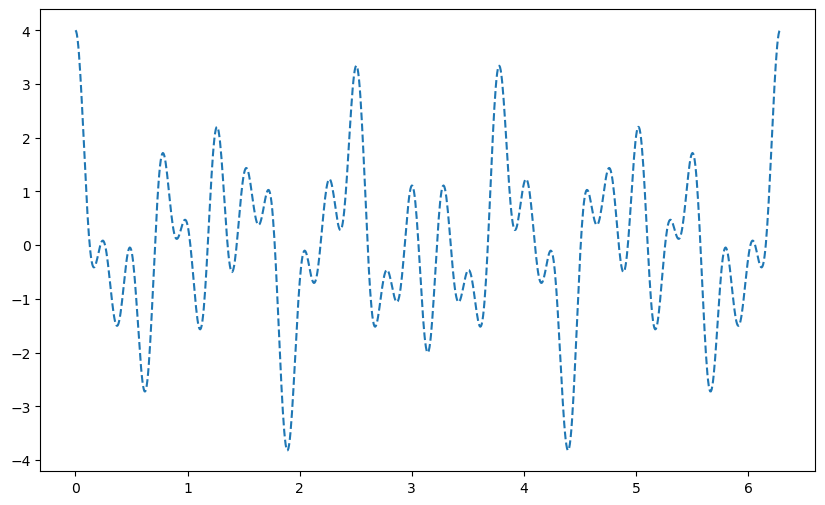

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(t, x_t, label='Оригінальний вхідний сигнал', linestyle='--')
plt.plot(t, restored_real, label='Відновлений реальний сигнал фільтра')
plt.plot(t, restored_hann, label='Відновлений відфільтрований сигнал фон Ханна')
plt.plot(t, restored_lanczos, label='Відновлений відфільтрований сигнал Ланчоса')
plt.title('Оригінальні та відновлені аналогові сигнали')
plt.xlabel('Час')
plt.ylabel('Амплітуда')
plt.legend()
plt.grid(True)
plt.show()

### 9.Пояснити отримані результати, зробити висновки.

Пояснення результатів:
Вхідний сигнал 𝑥(𝑡) складається з кількох гармонік різних частот:  cos(25𝑡), cos(5𝑡), cos(8𝑡), cos(15𝑡). Його спектр охоплює частоти до 25 рад/сек.

Висновки:
На графіку видно, що вхідний сигнал чітко відрізняється від фільтрованих сигналів. Це пов'язано з тим, що реальний фільтр і згладжені фільтри пропускають лише високі частоти, обмежуючи низькочастотні компоненти.

Реальний фільтр має чітке обмеження на граничній частоті 20 рад/сек, через що низькочастотні компоненти сигналу пригнічені. Фільтрований сигнал менш гладкий, оскільки немає згладжування вікнами.

Згладжені фільтри фон Ганна та Ланчоса пропонують дещо інші результати, оскільки їхні віконні функції надають плавніший перехід між пропусканням і пригніченням частот. Це помітно на графіку — ці сигнали більш гладкі, порівняно з сигналом, отриманим реальним фільтром.